In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2019-05-26 17:39:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com... 2a00:1450:4010:c0b::80, 173.194.222.128
Connecting to storage.googleapis.com|2a00:1450:4010:c0b::80|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: '/tmp/irish-lyrics-eof.txt'

/tmp/irish-lyrics-e 100%[=====================>]  67.35K  --.-KB/s   in 0.001s 

2019-05-26 17:39:23 (94.9 MB/s) - '/tmp/irish-lyrics-eof.txt' saved [68970/68970]



In [3]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'harp': 366, 'hark': 1234, 'harm': 1907, 'defend': 1574, 'better': 704, 'hare': 1994, 'rats': 2391, 'sang': 599, 'sailed': 849, 'kilrain': 670, 'sent': 1004, 'drumslieve': 1376, 'joking': 2223, 'factory': 1528, 'send': 808, 'hired': 2010, 'til': 443, 'tin': 2327, 'lift': 2093, 'tie': 2406, 'hills': 331, 'speak': 1005, 'life': 191, 'desolation': 898, 'machine': 1586, 'tis': 162, 'pulled': 1711, 'divinity': 1630, 'green': 60, 'abusing': 2043, 'darlin': 741, 'dear': 78, 'deas': 557, 'black': 199, 'greet': 944, 'prouder': 2422, 'dead': 135, 'cats': 948, 'tabhair': 1671, 'cabin': 839, 'quitely': 2051, 'such': 349, 'lions': 1594, 'unprofaned': 1566, 'marks': 1299, 'london': 2479, 'trades': 2382, 'reap': 1984, 'lads': 496, 'mccorley': 358, 'sped': 2239, 'farrell': 578, 'pure': 365, 'each': 209, 'conversations': 2211, 'vigil': 1227, 'volunteers': 1576, 'moving': 1203, 'trust': 2349, 'fishin': 1766, 'garden': 579, 'though': 273, 'cheeks': 431, 'cheer': 2181, 'drown': 850, 'homes': 1404, 'cheek

In [0]:

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [7]:
print(ys[6])

[ 0.  0.  0. ...,  0.  0.  0.]


In [8]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48    2]
[ 0.  0.  0. ...,  0.  0.  0.]


In [9]:
print(tokenizer.word_index)

{'harp': 366, 'hark': 1234, 'harm': 1907, 'defend': 1574, 'better': 704, 'hare': 1994, 'rats': 2391, 'sang': 599, 'sailed': 849, 'kilrain': 670, 'sent': 1004, 'drumslieve': 1376, 'joking': 2223, 'factory': 1528, 'send': 808, 'hired': 2010, 'til': 443, 'tin': 2327, 'lift': 2093, 'tie': 2406, 'hills': 331, 'speak': 1005, 'life': 191, 'desolation': 898, 'machine': 1586, 'tis': 162, 'pulled': 1711, 'divinity': 1630, 'green': 60, 'abusing': 2043, 'darlin': 741, 'dear': 78, 'deas': 557, 'black': 199, 'greet': 944, 'prouder': 2422, 'dead': 135, 'cats': 948, 'tabhair': 1671, 'cabin': 839, 'quitely': 2051, 'such': 349, 'lions': 1594, 'unprofaned': 1566, 'marks': 1299, 'london': 2479, 'trades': 2382, 'reap': 1984, 'lads': 496, 'mccorley': 358, 'sped': 2239, 'farrell': 578, 'pure': 365, 'each': 209, 'conversations': 2211, 'vigil': 1227, 'volunteers': 1576, 'moving': 1203, 'trust': 2349, 'fishin': 1766, 'garden': 579, 'though': 273, 'cheeks': 431, 'cheer': 2181, 'drown': 850, 'homes': 1404, 'cheek

In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
12038/12038 [==============================] - 8s 676us/sample - loss: 6.7198 - acc: 0.0690
Epoch 2/100
12038/12038 [==============================] - 8s 676us/sample - loss: 5.8557 - acc: 0.1067
Epoch 3/100
12038/12038 [==============================] - 9s 773us/sample - loss: 5.1519 - acc: 0.1450
Epoch 4/100
12038/12038 [==============================] - 8s 685us/sample - loss: 4.6195 - acc: 0.1849
Epoch 5/100
12038/12038 [==============================] - 8s 649us/sample - loss: 3.7084 - acc: 0.2684
Epoch 6/100
12038/12038 [==============================] - 8s 661us/sample - loss: 2.9987 - acc: 0.3639
Epoch 7/100
12038/12038 [==============================] - 8s 705us/sample - loss: 2.4936 - acc: 0.4380
Epoch 8/100
12038/12038 [==============================] - 8s 704us/sample - loss: 2.1202 - acc: 0.5115
Epoch 9/100
12038/12038 [==============================] - 9s 748us/sample - loss: 1.8476 - acc: 0.5611
Epoch 10/100
12038/12038 [==============================] - 8s 6

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

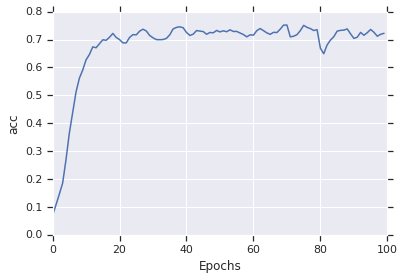

In [12]:
plot_graphs(history, 'acc')


In [16]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this half dozen stout died and laid the song of the warrior bard shaken silver home now since i spent up in dublin call belfast city and the brother william stood at the door and they ring at me diggin for erin go bragh together again soon i patrick up her pipes bellows chanters and all up with a glass of love easy as the sea came to james connolly cry my a going to a baby on free sweep but away me forget old ireland all care of me darling in strife roaming tomorrow i paid than him went by
